In [38]:
import pandas as pd
import numpy as np
import pickle

In [3]:
# We import the traffic data

base_path = 'C:/Users/Mikel/Desktop/Archivos/Estudios/Ciencia de Datos/TFM/Tercera iteración/complete_dict_buf.pickle'
with open(base_path, 'rb') as handle:
    traffic_dict = pickle.load(handle)

In [4]:
# Extraction of intensity, occupancy

int_occ_dict = {}
for key, df in traffic_dict.items():
    int_occ_dict[key] = df[['intensidad', 'ocupacion']]

In [33]:
# We calculate congestion with a simple formula (getting the top 20 values in intensity terms, s)

cong_dict = {}
for key, df in int_occ_dict.items():
    df_ = df.nlargest(20, ['intensidad'])
    mean_ = df_['ocupacion'].mean()
    int_ = np.array(df['intensidad'])
    occ_ = np.array(df['ocupacion'])
    ok = (occ_ < mean_).sum()
    ok_per = (ok/len(occ_)) * 100
    nok_per = 100 - ok_per
    nok_per = round(nok_per, 2)
    cong_dict[key] = nok_per

<AxesSubplot:xlabel='ocupacion', ylabel='intensidad'>

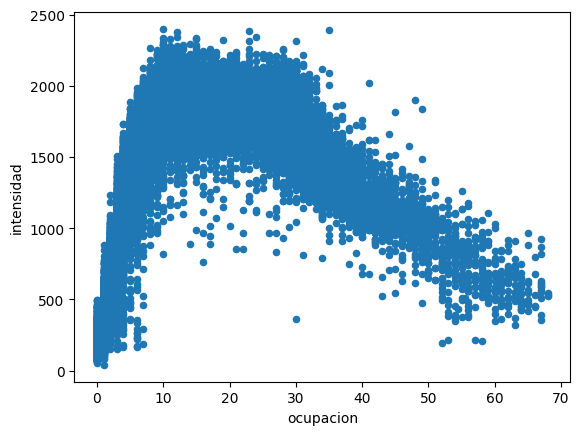

In [36]:
int_occ_dict[4442].plot.scatter(x='ocupacion', y='intensidad')

In [51]:
stations_path = 'C:/Users/Mikel/Desktop/estaciones_chamberi.csv'
stations = pd.read_csv(stations_path)
st = stations[stations['id'].isin(cong_dict.keys())]
st = st.sort_values('id')
congs = []
for key in sorted(cong_dict):
    congs.append(cong_dict[key])
st['cong'] = congs
st_ = st[['id', 'utm_x', 'utm_y', 'cong']]
st_.to_csv('C:/Users/Mikel/Desktop/cong.csv')